In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, \
                            PrecisionRecallDisplay, RocCurveDisplay

In [2]:
data_1 = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
data_1.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

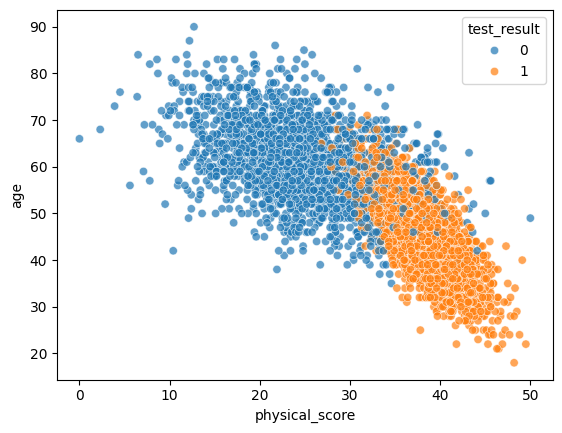

In [4]:
sns.scatterplot(data_1, x='physical_score', y='age', hue='test_result', alpha=0.7);

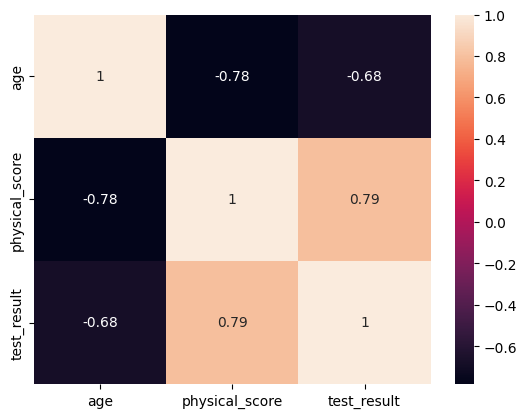

In [5]:
sns.heatmap(data_1.corr(), annot=True);

In [6]:
X = data_1.drop('test_result', axis=1)
y = data_1['test_result']

In [7]:
#Логистическая регрессия без кросс-валидации

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_predict = model.predict(X_test)

In [15]:
#Метрики оценки модели классификации (ROC-кривая)

In [16]:
accuracy_score(y_test, y_predict)

0.93

In [17]:
confusion_matrix(y_test, y_predict)

array([[172,  21],
       [ 14, 293]], dtype=int64)

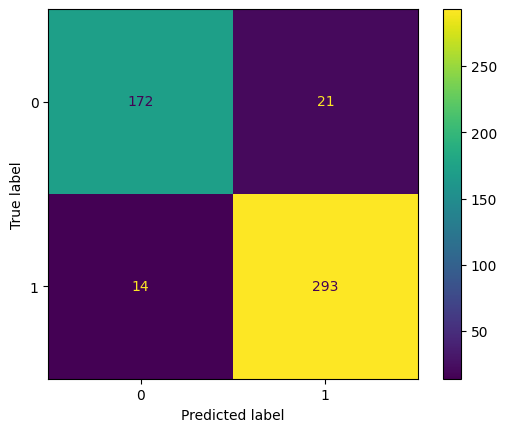

In [18]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [19]:
print(classification_report(y_test, y_predict)) #precision - как часто мы правильно классифицируем случаи из 
                                                #этого класса из всего набора значений этого класса
                                                #recall - как часто мы находим значения этого класса из всего
                                                #набора значений этого класса

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



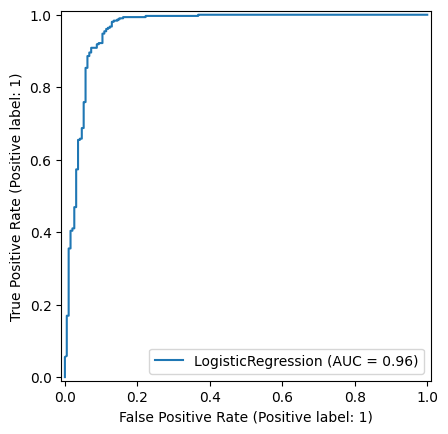

In [22]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

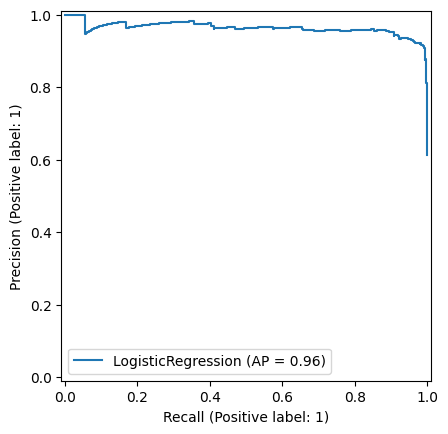

In [23]:
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

In [1]:
#Мульти-классовая классификация

In [2]:
iris_data = pd.read_csv('../DATA/iris.csv')

In [3]:
iris_data

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

<Axes: xlabel='petal_length', ylabel='petal_width'>

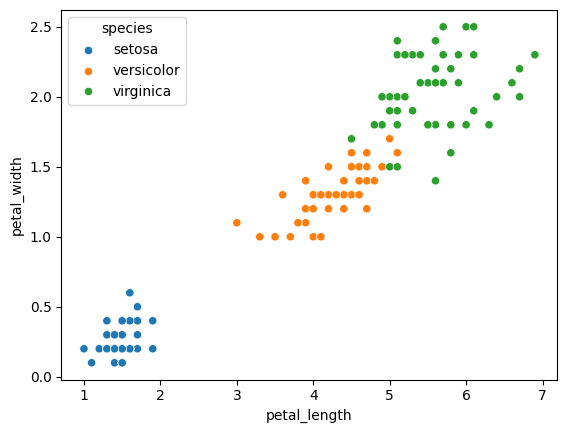

In [4]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris_data, hue='species') # setosa четко отделим от других

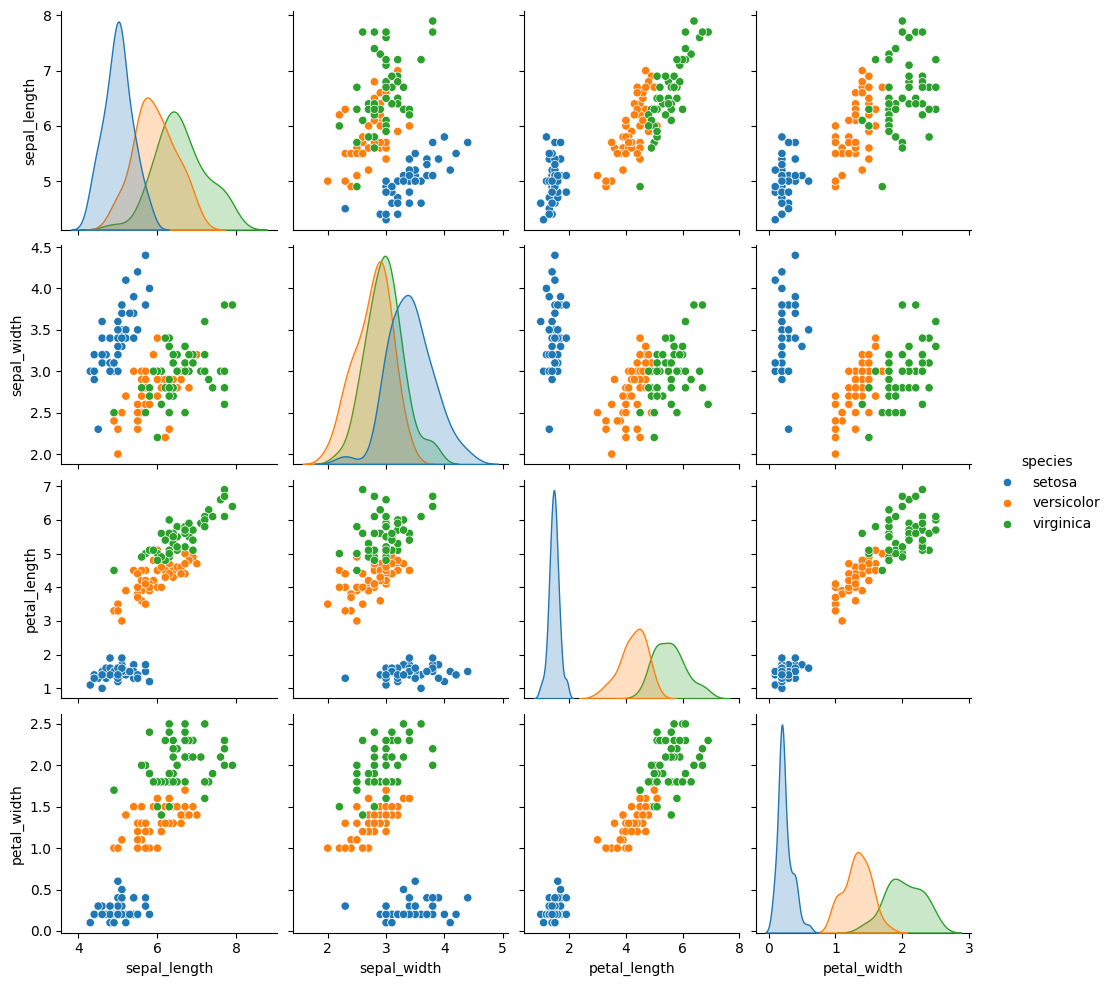

In [5]:
sns.pairplot(iris_data, hue='species')

In [6]:
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = LogisticRegression(solver='saga',     #алгоритм оптимизации
                           multi_class='ovr', #multi_class - способы разделения на несколько классов.
                           max_iter=5000)     #ovr - обучаем модель отделять один класс от других, и так для всех классов

In [12]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

parama_grid = {'penalty': penalty,
               'l1_ratio': l1_ratio,
               'C': C}

In [13]:
grid_model = GridSearchCV(model, param_grid=parama_grid)

In [14]:
grid_model.fit(X_train, y_train)

C:\Users\SMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\SMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\SMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\SMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\SMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarni

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [15]:
y_predict = grid_model.predict(X_test)

In [16]:
accuracy_score(y_test, y_predict)

0.9736842105263158

In [19]:
confusion_matrix(y_test, y_predict)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

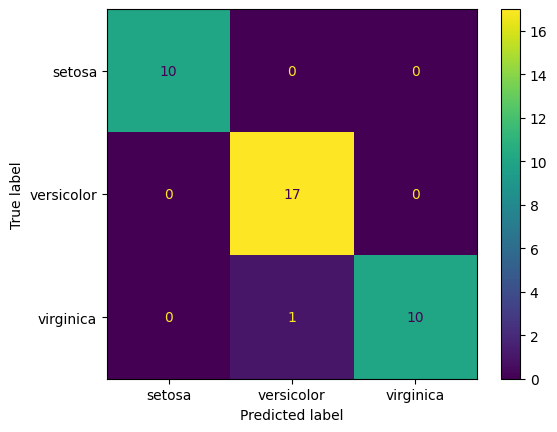

In [20]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [21]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

